Implemented LDA using sklearn to find the optimal number of distinct topics from the data focused on experiences of people using invisalign expressed on reddit.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [ ]:
# Import Dataset
df = pd.read_excel('/content/drive/MyDrive/invisalignKeyword_content_separate.xlsx')
print(df.shape)  #> (2361, 3)
df.head()

(8960, 3)


,SubmissionNumber,Subreddit,Content
0,1,invisalign,Did any of you ever get used to the feeling of...
1,1,NaN,Yeah now Im worried about not being able to ha...
2,1,NaN,Same! I dislike the feeling of the attachments...
3,1,NaN,Im on tray 10 and I feel uncomfortable both in...
4,1,NaN,"Totally understanding the lip thing, it would ..."


In [ ]:
#nltk.download('stopwords')  -- Already downloaded
stop = stopwords.words('english')

# Function for removing the stopword 
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    # joining the list of words with space separator
    return " ".join(text)
    
#Function for removing punctuation
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuation with no space, which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

# Function for obtaining the emoticons
def get_emoticons(text):
    emoticons = re.findall('[:|;|=][-|^]?[W)|W(|D|P]', text)
    return emoticons

# Function for removing the emoticons
def remove_emoticons(text):
    '''a function for removing the emoticon'''
    # get the emoticons 
    emoticons = get_emoticons(text)
    # removing the emoticons and retains the words
    text = [word for word in text.split() if word not in emoticons]
    # joining the list of words with space separator
    return " ".join(text)

# Function to remove symbols
def remove_symbols(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text) # Removed @mentions
    text = re.sub(r'#','',text) #Removing the # symbols
    text = re.sub(r'https?:\/\/\S+','', text) # Removing the hyper link
    return text

In [ ]:
df['Content'] = df['Content'].apply(remove_punctuation).apply(remove_stopwords).apply(remove_emoticons).apply(remove_symbols)
df

,SubmissionNumber,Subreddit,Content
0,1,invisalign,ever get used feeling trays mouth never throug...
1,1,NaN,yeah im worried able handle wearing im finished …
2,1,NaN,dislike feeling attachments trays
3,1,NaN,im tray 10 feel uncomfortable lol theyre natur...
4,1,NaN,totally understanding lip thing would look lik...
...,...,...,...
8955,494,NaN,dont clench teeth hopefully front ones need catch
8956,494,NaN,notice bite changed negatively first round inv...
8957,494,NaN,gosh hope doesnt turn max lengthy procedure lo...
8958,494,NaN,understanding relatively normal bite continue ...


In [ ]:
data = df.Content.values.tolist()
print(type(data))
print(data)

<class 'list'>
['ever get used feeling trays mouth never throughout entire process uncomfortable missed braces', 'yeah im worried able handle wearing im finished …', 'dislike feeling attachments trays', 'im tray 10 feel uncomfortable lol theyre natural teeth feel strangely sharp thin theyre trays feel bulky make lips protrude', 'totally understanding lip thing would look like pouting felt really uncomfortable', 'get natural teeth strangely thin lol sooo weird', 'uncomfortable take love softness fact stops grinding', 'omg made want grind …', 'cannot stop sucking type driving nuts im tray 8 2 weeks 7 go ugh', 'im tray 29 still suck constantly feel like theyre filling saliva hate', 'keep thinking anyone recommend look progress thankem', 'im middle tray 5 always sucking tongue sore bite ramps', 'makes mouth hurt longer term sores next day quickly tried break habit start keep \xad', '3rd set trays fully used without type distraction discomfort', 'totally used point theyre actually feels irr

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
vec.fit(data)

import pandas as pd
feature_data = pd.DataFrame(vec.transform(data).toarray(), columns=sorted(vec.vocabulary_.keys()))

In [ ]:
feature_data

,02mm,03,03mm,04,04mm,05,05mm,080,08242021,0if,...,œyoud,œyoull,œyour,œº,œœ,œˆï,ši,šim,ššš,žš
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(feature_data)

In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

In [ ]:
print(reduced.shape)

(8960, 5740)


In [ ]:
print(reduced)

[[-7.97701969e-02 -6.84746603e-02  1.43300669e-01 ... -1.36520026e-02
   1.37722687e-02 -1.31860429e-03]
 [-8.10995770e-02 -1.76297914e-01  1.60103071e-01 ...  6.87138394e-03
  -2.62010555e-02  2.11101022e-02]
 [-1.50424953e-01 -1.16888567e-01 -4.33303565e-03 ...  8.29978952e-03
  -9.55449687e-04 -3.55717557e-04]
 ...
 [-1.68030467e-01  8.55910402e-03 -1.35610981e-01 ... -1.03403555e-02
  -1.69980884e-04  2.11542553e-02]
 [ 1.19310740e-01 -2.65257919e-02 -2.26683820e-03 ...  2.42831356e-04
   1.15963641e-03 -7.91487402e-03]
 [-1.06563996e-01 -3.53528807e-02 -1.41369735e-01 ... -3.82515908e-03
  -6.70589737e-03 -7.76417268e-03]]


In [ ]:
# Adding the min value for obtaining a positive matrix
min_val = reduced.min()
new_reduced = reduced+abs(min_val)
new_reduced.min()

0.0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

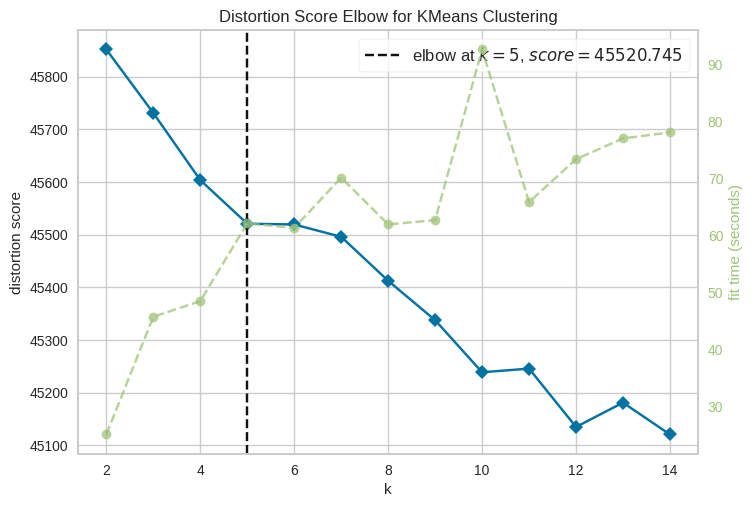

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Elbow Method for K means
# Import ElbowVisualizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15), timings= True)
visualizer.fit(new_reduced)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
# play around with this
n_topics = 5

lda = LatentDirichletAllocation(n_components = n_topics, max_iter=5, learning_method='online',learning_offset=50., random_state=0)

lda.fit(new_reduced)

# making LDA TOP MATRIX USING CORPUS TF
lda_topic_modelling = lda.fit_transform(new_reduced)
lda_topic_modelling



array([[0.20368616, 0.19994643, 0.19856036, 0.19841268, 0.19939437],
       [0.20018133, 0.19848979, 0.20176832, 0.19980693, 0.19975363],
       [0.19996507, 0.2009717 , 0.2010981 , 0.20010541, 0.19785972],
       ...,
       [0.19756918, 0.19930316, 0.20083669, 0.20206626, 0.20022472],
       [0.19940584, 0.19783001, 0.19958581, 0.20138311, 0.20179522],
       [0.19986326, 0.20044122, 0.19834943, 0.19942817, 0.20191792]])

In [ ]:
lda_topic_modelling.shape


In [ ]:
type(lda_topic_modelling)

numpy.ndarray

In [ ]:
print(lda_topic_modelling)

[[0.20368616 0.19994643 0.19856036 0.19841268 0.19939437]
 [0.20018133 0.19848979 0.20176832 0.19980693 0.19975363]
 [0.19996507 0.2009717  0.2010981  0.20010541 0.19785972]
 ...
 [0.19756918 0.19930316 0.20083669 0.20206626 0.20022472]
 [0.19940584 0.19783001 0.19958581 0.20138311 0.20179522]
 [0.19986326 0.20044122 0.19834943 0.19942817 0.20191792]]


In [ ]:
print(data[0])

ever get used feeling trays mouth never throughout entire process uncomfortable missed braces


In [ ]:
print(type(list(lda_topic_modelling[0])))

<class 'list'>


In [ ]:
labels = []
for i in lda_topic_modelling:
  list_1 = list(i)
  #max_value = max(list_1)
  max_index = list_1.index(max(list_1))
  labels.append(max_index)

In [ ]:
print(labels)

In [ ]:
# dictionary of lists
dict = {'text':[],
        'label': []}

In [ ]:
for text,label in zip(data,labels):
  dict['text'].append(text)
  dict['label'].append(label)


In [ ]:
results = pd.DataFrame(dict)
 
print(results)

                                                   text  label
0     ever get used feeling trays mouth never throug...      0
1     yeah im worried able handle wearing im finished …      2
2                     dislike feeling attachments trays      2
3     im tray 10 feel uncomfortable lol theyre natur...      4
4     totally understanding lip thing would look lik...      0
...                                                 ...    ...
8955  dont clench teeth hopefully front ones need catch      1
8956  notice bite changed negatively first round inv...      3
8957  gosh hope doesnt turn max lengthy procedure lo...      3
8958  understanding relatively normal bite continue ...      4
8959  yeah think thats pretty common intermediate ph...      4

[8960 rows x 2 columns]


In [ ]:
y = results['label']
y.shape

(8960,)

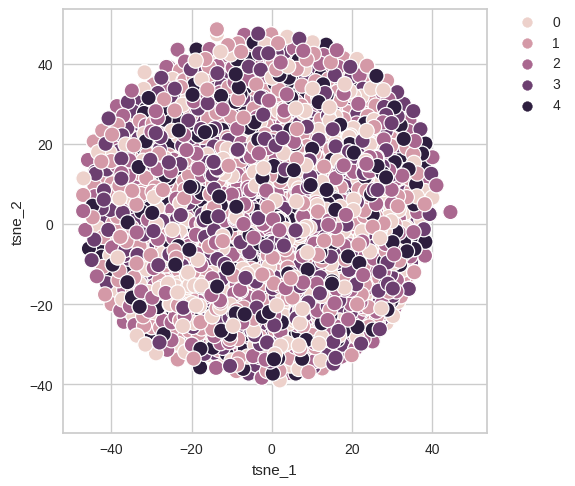

In [ ]:
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
 
# We want to get TSNE embedding with 2 dimensions
n_components = 2
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(new_reduced)
tsne_result.shape
# (1000, 2)
# Two dimensions for each of our images
 
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=120)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [ ]:
results.to_excel('classified_results.xlsx',index=False)